*Digit Recognizer* 🚦 🎱
=====

Reference
- Irene Ban, [Deep learning / Machine learning] Convenient understanding of convolutional neural networks (CNN) (Korean) : https://halfundecided.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-cnn-convolutional-neural-networks-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-836869f88375
- MICHAEL MOMMERT, Kaggle 'MNIST Neural Network Visualization' : https://www.kaggle.com/code/mommermi/mnist-neural-network-visualization/notebook

# Neural Networks

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.animation
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model
plt.rcParams["animation.html"] = "jshtml"

In [2]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Split Data

In [3]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [5]:
print(y_train.value_counts().sort_index())
print(y_train.count())
train_No = y_train.count()
print(y_test.value_counts().sort_index())
print(y_test.count())
test_No = y_test.count()

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


### Model.1

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_trainN = to_categorical(y_train)
y_testN = to_categorical(y_test)

# normalize
X_trainN = X_train.iloc[:,1:]
X_trainN = np.array(X_trainN.astype('float32') / 255)
X_testN = X_test.iloc[:,1:]
X_testN = np.array(X_testN.astype('float32') / 255)

# network parameters
input_size = X_trainN.shape[1]
batch_size = 128
hidden_units = 256
dropout = 0.25

In [9]:
# this model is a 3-layer MLP with sigmoid and dropout after each layer
model_1 = tf.keras.models.Sequential()
model_1.add(layers.Dense(hidden_units, input_dim=input_size))
model_1.add(layers.Activation('sigmoid'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(hidden_units))
model_1.add(layers.Activation('sigmoid'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(num_labels))
model_1.add(layers.Activation('softmax'))
model_1.summary()

# loss function for one-hot vector using adam optimizer
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model
model_1.fit(X_trainN, y_trainN, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model_1.evaluate(X_testN, y_testN, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [8]:
# this model is a 3-layer MLP with ReLU and dropout after each layer
model_1 = tf.keras.models.Sequential()
model_1.add(layers.Dense(hidden_units, input_dim=input_size))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(hidden_units))
model_1.add(layers.Activation('relu'))
model_1.add(layers.Dropout(dropout))
model_1.add(layers.Dense(num_labels))
model_1.add(layers.Activation('softmax'))
model_1.summary()

# loss function for one-hot vector using adam optimizer
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model
model_1.fit(X_trainN, y_trainN, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model_1.evaluate(X_testN, y_testN, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [10]:
get_layer_output_1 = tf.keras.backend.function([model_1.layers[0].input],
                              [model_1.layers[1].output, model_1.layers[4].output, model_1.layers[7].output])

layer1_output_1, layer2_output_1, layer3_output_1 = get_layer_output_1([X_trainN])

In [11]:
train_ids = [np.arange(len(y_trainN))[y_trainN[:,ids] == 1] for ids in range(10)]

In [24]:
%%capture
%matplotlib inline

# digit to be plotted
digit = 7

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
    
ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    
        
def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(X_trainN[train_ids[digit][id]].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(layer1_output_1[train_ids[digit][id]].reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(layer2_output_1[train_ids[digit][id]].reshape((16,16)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output_1[train_ids[digit][id]], 
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot

# define animation
ani_1 = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=200)

In [25]:
ani_1

In [26]:
ani_1.save('ani_1.mp4', writer="ffmpeg")

### Model.2
Convolution Neural Network(CNN)

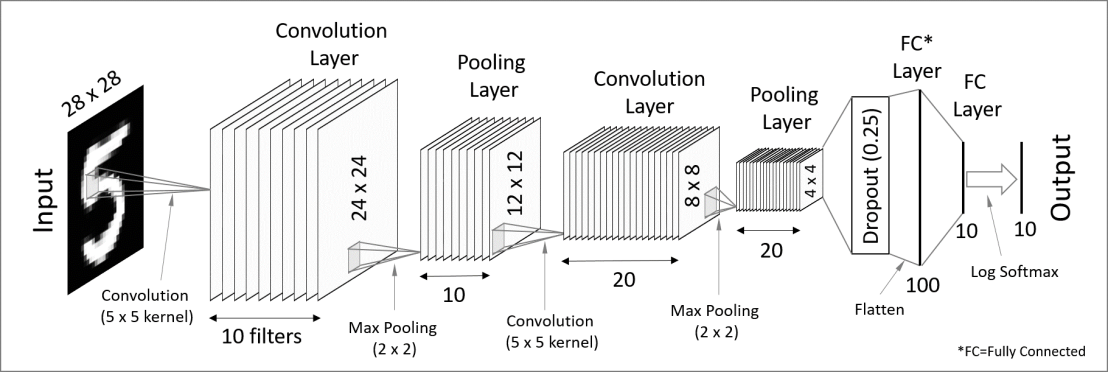

In [7]:
# 28 x 28 reshape
train_images = X_trainN.reshape((train_No, 28, 28, 1))
train_labels = np.array(X_train.iloc[:,0])
test_images = X_testN.reshape((test_No, 28, 28, 1))
test_labels = np.array(X_test.iloc[:,0])

In [8]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(20, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))
 
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()
 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_2.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 20)          0         
                                                                 
 flatten (Flatten)           (None, 320)               0

#### Visualization

In [56]:
get_layer_output_2 = tf.keras.backend.function([model_2.layers[0].input],
                              [model_2.layers[0].output, model_2.layers[1].output, model_2.layers[2].output, model_2.layers[3].output, model_2.layers[6].output, model_2.layers[7].output])

layer1_output_2, layer2_output_2, layer3_output_2, layer4_output_2, layer6_output_2, layer7_output_2 = get_layer_output_2([train_images])

##### Example1

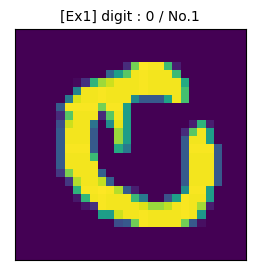

In [57]:
# Example1 selection
digit_ex1 = 0 # digit set
ex1_no = 0 # Number of digit setted

f, ax_ex1 = plt.subplots(1, 1, figsize=(6,3))

ax_ex1.axes.get_xaxis().set_visible(False)
ax_ex1.axes.get_yaxis().set_visible(False)
ax_ex1.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_plot = ax_ex1.imshow(X_trainN[train_ids[digit_ex1]][ex1_no].reshape((28,28)))

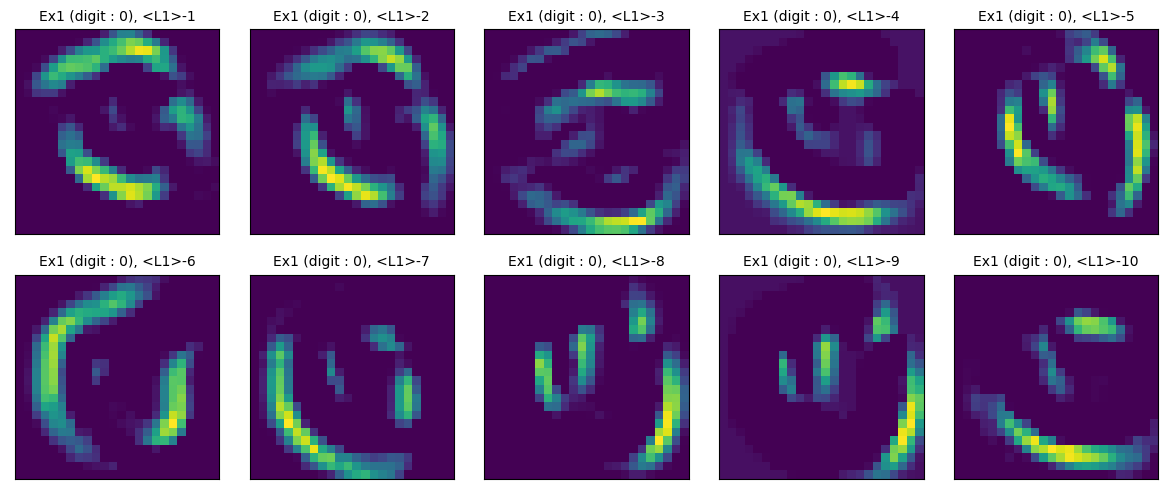

In [59]:
# Example1 1st Convolution Layer (L1)
l1_filters = 10; # Number of Filters
    
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l1_filters:
        ax.set_title('Ex1 (digit : {}), <L1>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l1_plot = ax.imshow(layer1_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

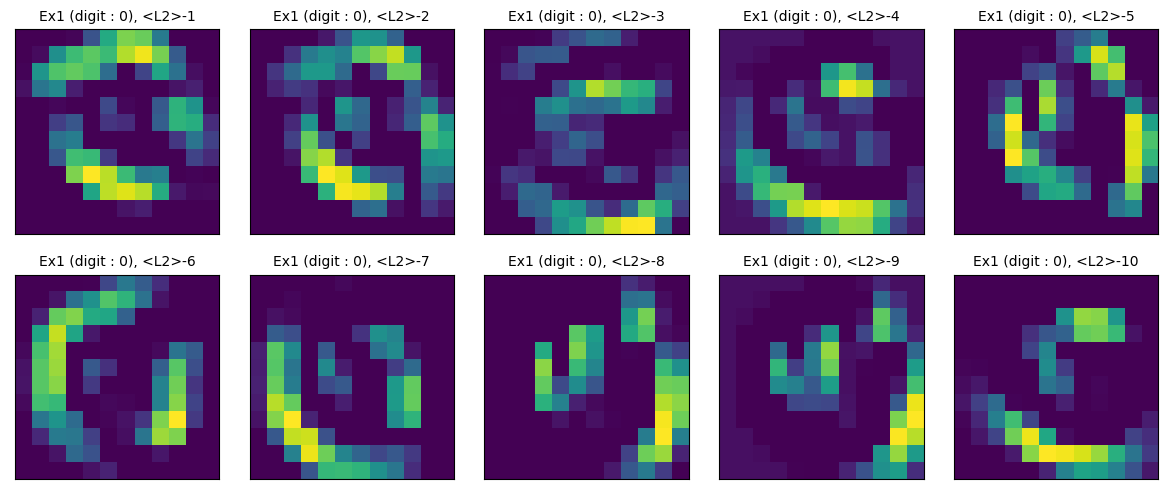

In [60]:
# Example1 1st Maxpooling Layer (L2)
l2_filters = 10; # Number of Filters

f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l2_filters:
        ax.set_title('Ex1 (digit : {}), <L2>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l2_plot = ax.imshow(layer2_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

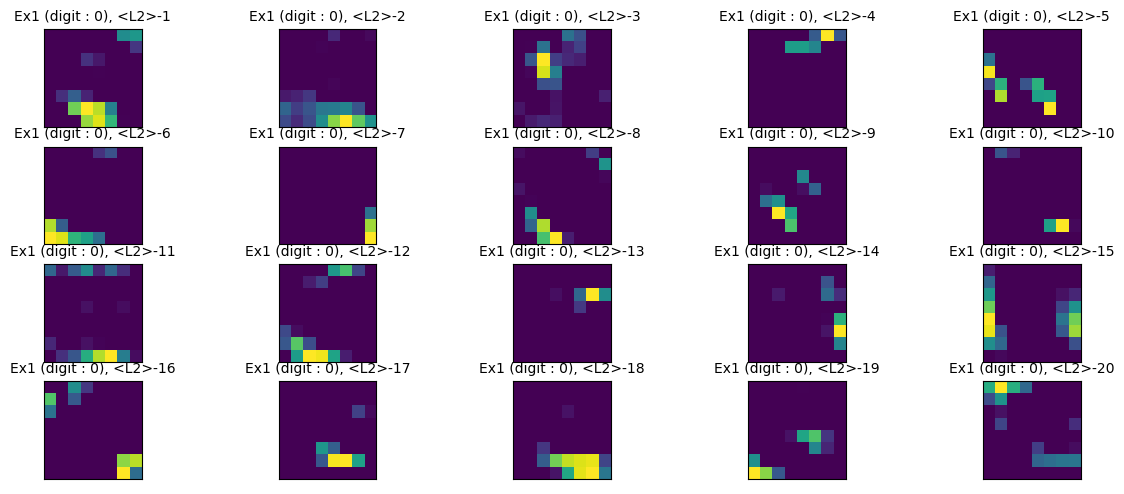

In [61]:
# Example1 2nd Convolution Layer (L3)
l3_filters = 20; # Number of Filters

f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l3_filters:
        ax.set_title('Ex1 (digit : {}), <L2>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l3_plot = ax.imshow(layer3_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

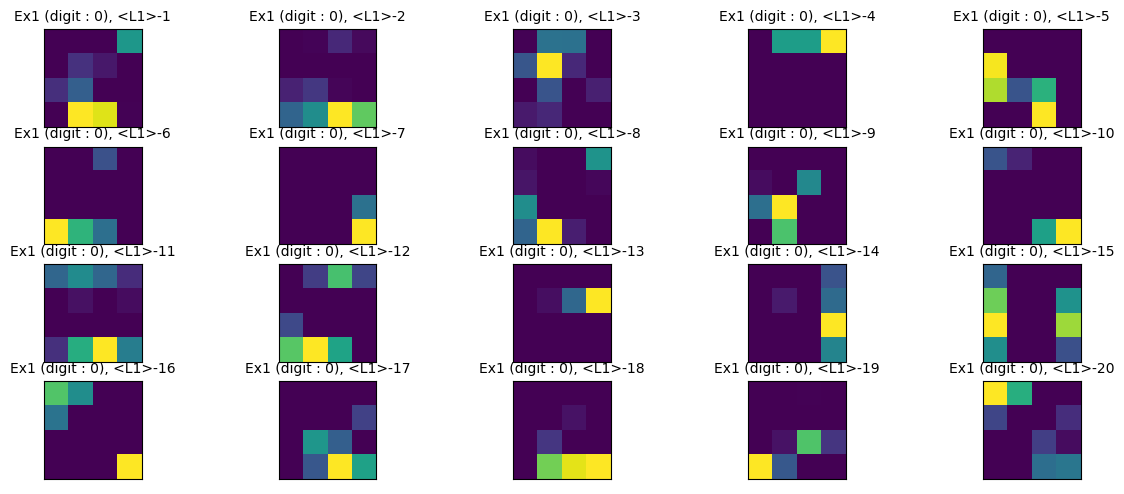

In [62]:
# Example1 2nd Maxpooling Layer (L4)
l4_filters = 20; # Number of Filters
    
f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l4_filters: # number of filter : 20
        ax.set_title('Ex1 (digit : {}), <L1>-{}'.format(digit_ex1,k+1), fontsize=10)
        ex1_l4_plot = ax.imshow(layer4_output_2[train_ids[digit_ex1]][ex1_no][:,:,k])

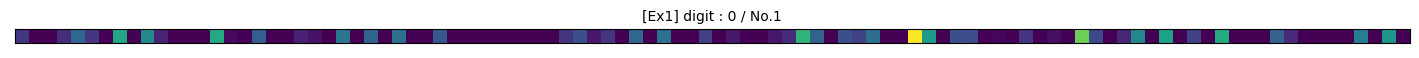

In [63]:
# Example1 Flatten-FC Layer (L5-L6)
layer6_output_2n = layer6_output_2[train_ids[digit_ex1]][ex1_no] / max(layer6_output_2[train_ids[digit_ex1]][ex1_no])
f, ax_ex1_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex1_l5.axes.get_xaxis().set_visible(False)
ax_ex1_l5.axes.get_yaxis().set_visible(False)
ax_ex1_l5.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_l5_plot = ax_ex1_l5.imshow(layer6_output_2n.reshape(1,100))

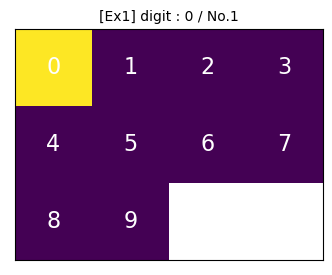

In [64]:
# Example1 Output Layer (L7)
f, ax_ex1_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex1_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex1_out.axes.get_xaxis().set_visible(False)
ax_ex1_out.axes.get_yaxis().set_visible(False)
ax_ex1_out.set_title('[Ex1] digit : 0 / No.{}'.format(ex1_no + 1), fontsize=10)
ex1_out_plot = ax_ex1_out.imshow(np.append(layer7_output_2[train_ids[digit_ex1]][ex1_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

##### Example2

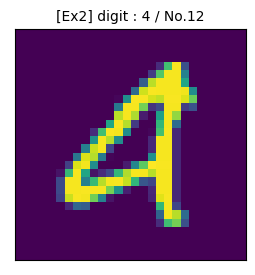

In [65]:
# Example2 selection
digit_ex2 = 4 # digit set
ex2_no = 11 # Number of digit setted

f, ax_ex2 = plt.subplots(1, 1, figsize=(6,3))

ax_ex2.axes.get_xaxis().set_visible(False)
ax_ex2.axes.get_yaxis().set_visible(False)
ax_ex2.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_plot = ax_ex2.imshow(X_trainN[train_ids[digit_ex2]][ex2_no].reshape((28,28)))

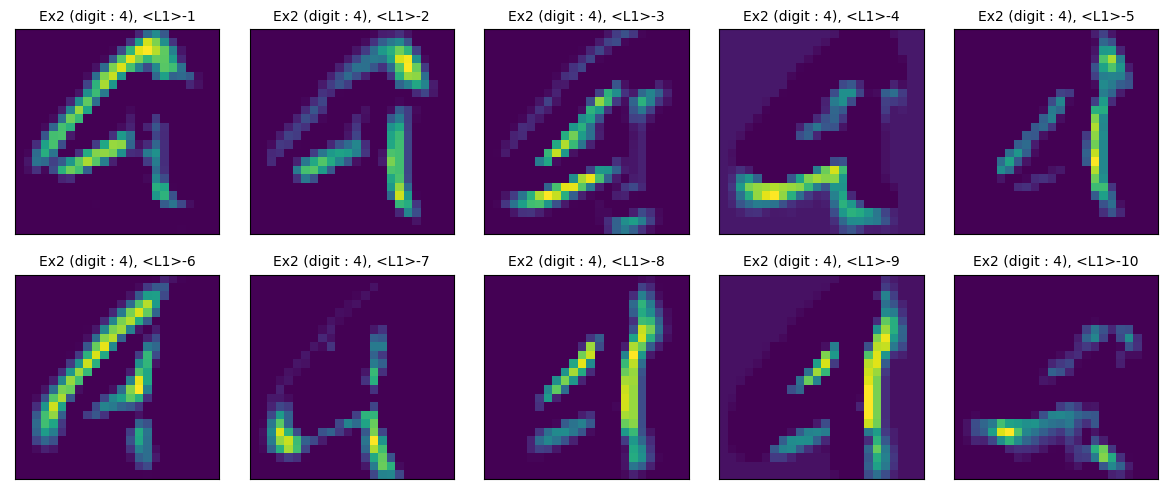

In [67]:
# Example2 1st Convolution Layer (L1)
l1_filters = 10; # Number of Filters
    
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l1_filters:
        ax.set_title('Ex2 (digit : {}), <L1>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l1_plot = ax.imshow(layer1_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

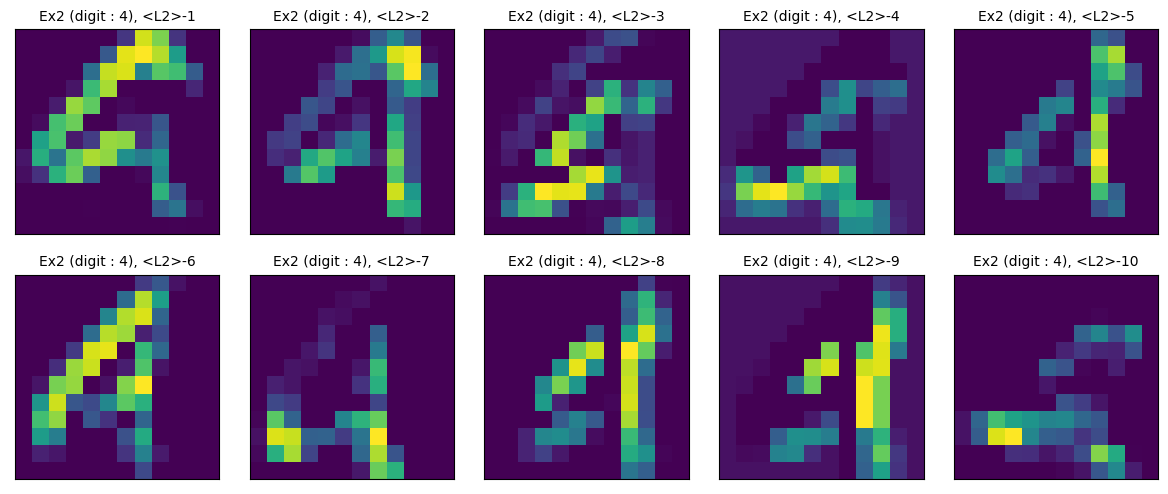

In [68]:
# Example2 1st Maxpooling Layer (L2)
l2_filters = 10; # Number of Filters

f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l2_filters:
        ax.set_title('Ex2 (digit : {}), <L2>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l2_plot = ax.imshow(layer2_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

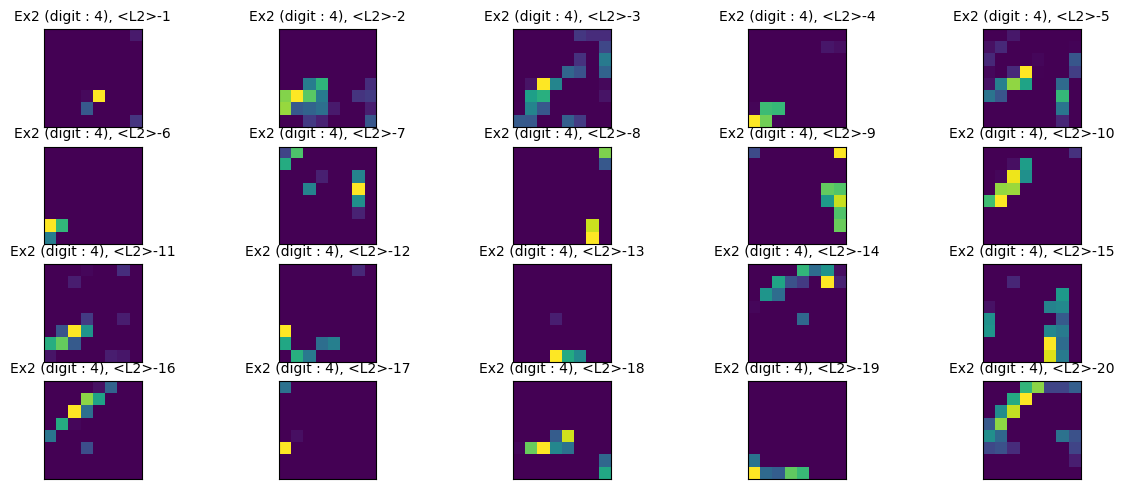

In [69]:
# Example2 2nd Convolution Layer (L3)
l3_filters = 20; # Number of Filters

f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l3_filters:
        ax.set_title('Ex2 (digit : {}), <L2>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l3_plot = ax.imshow(layer3_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

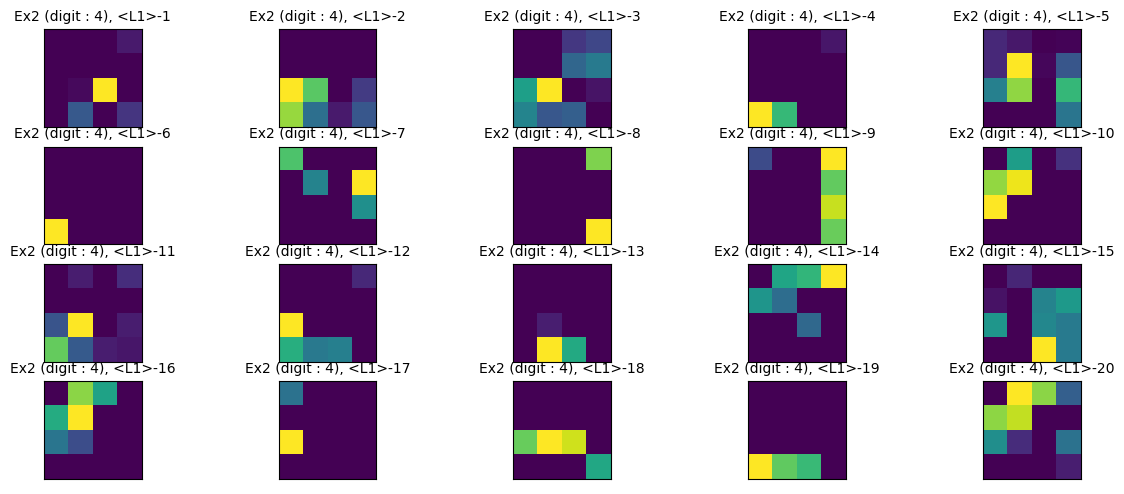

In [70]:
# Example2 2nd Maxpooling Layer (L4)
l4_filters = 20; # Number of Filters
    
f, ax_arr = plt.subplots(4, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for k, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if k <= l4_filters: # number of filter : 20
        ax.set_title('Ex2 (digit : {}), <L1>-{}'.format(digit_ex2,k+1), fontsize=10)
        ex2_l4_plot = ax.imshow(layer4_output_2[train_ids[digit_ex2]][ex2_no][:,:,k])

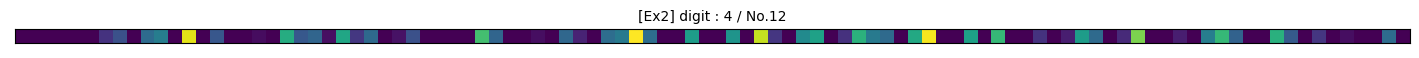

In [71]:
# Example2 Flatten-FC Layer (L5-L6)
layer6_output_2ex2 = layer6_output_2[train_ids[digit_ex2]][ex2_no] / max(layer6_output_2[train_ids[digit_ex2]][ex2_no])
f, ax_ex2_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex2_l5.axes.get_xaxis().set_visible(False)
ax_ex2_l5.axes.get_yaxis().set_visible(False)
ax_ex2_l5.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_l5_plot = ax_ex2_l5.imshow(layer6_output_2ex2.reshape(1,100))

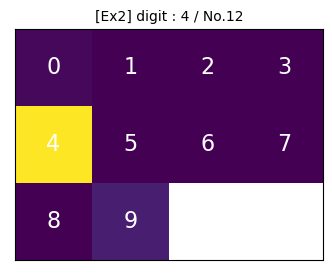

In [72]:
# Example2 Output Layer (L7)
f, ax_ex2_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex2_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex2_out.axes.get_xaxis().set_visible(False)
ax_ex2_out.axes.get_yaxis().set_visible(False)
ax_ex2_out.set_title('[Ex2] digit : 4 / No.{}'.format(ex2_no + 1), fontsize=10)
ex2_out_plot = ax_ex2_out.imshow(np.append(layer7_output_2[train_ids[digit_ex2]][ex2_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

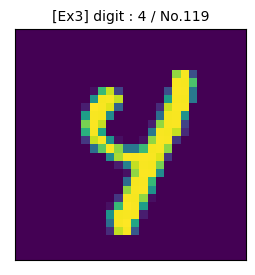

In [73]:
# Example3 selection
digit_ex3 = 4 # digit set
ex3_no = 118 # Number of digit setted

f, ax_ex3 = plt.subplots(1, 1, figsize=(6,3))

ax_ex3.axes.get_xaxis().set_visible(False)
ax_ex3.axes.get_yaxis().set_visible(False)
ax_ex3.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_plot = ax_ex3.imshow(X_trainN[train_ids[digit_ex3]][ex3_no].reshape((28,28)))

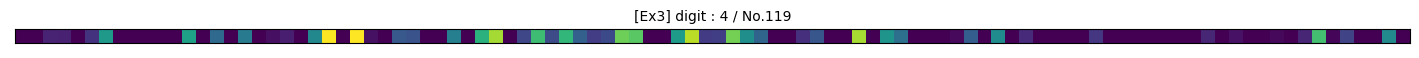

In [74]:
# Example3 Flatten-FC Layer (L5-L6)
layer6_output_2ex3 = layer6_output_2[train_ids[digit_ex3]][ex3_no] / max(layer6_output_2[train_ids[digit_ex3]][ex3_no])
f, ax_ex3_l5 = plt.subplots(1, 1, figsize=(18,12))

ax_ex3_l5.axes.get_xaxis().set_visible(False)
ax_ex3_l5.axes.get_yaxis().set_visible(False)
ax_ex3_l5.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_l5_plot = ax_ex3_l5.imshow(layer6_output_2ex3.reshape(1,100))

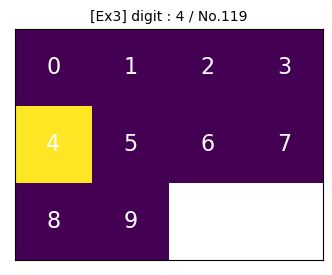

In [75]:
# Example3 Output Layer (L7)
f, ax_ex3_out = plt.subplots(1, 1, figsize=(6,3))

for i in range(3):
    for j in range(4):
        text = ax_ex3_out.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)   

ax_ex3_out.axes.get_xaxis().set_visible(False)
ax_ex3_out.axes.get_yaxis().set_visible(False)
ax_ex3_out.set_title('[Ex3] digit : 4 / No.{}'.format(ex3_no + 1), fontsize=10)
ex3_out_plot = ax_ex3_out.imshow(np.append(layer7_output_2[train_ids[digit_ex3]][ex3_no], 
                                       [np.nan, np.nan]).reshape((3,4)))

### Model.2-2(Increasing layers)

In [76]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(40, (5, 5), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.25))
 
model_3.add(layers.Flatten())
model_3.add(layers.Dense(100, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.summary()
 
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_3.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 40)          20040     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 40)          0         
                                                                 
 flatten_4 (Flatten)         (None, 640)              

In [77]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(tf.keras.layers.BatchNormalization())
model_4.add(layers.Dropout(0.25))
 
model_4.add(layers.Flatten())
model_4.add(layers.Dense(100, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))
model_4.summary()
 
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model_4.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                      